Simple model of DNN and CNN with Fashion mnist

In [2]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

import torchvision # To use dataset
import torchvision.transforms as transforms  # change the images to tensor####
from torch.utils.data import Dataset, DataLoader

In [3]:
# How to use GPU#####################
if torch.cuda.is_available():
  device = torch.device('cuda')
  print('GPU is available')
else:
  print('No')

GPU is available


In [4]:
# To get fashion_mnist dataset
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.8MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 203kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.76MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 11.7MB/s]


In [5]:
# length of data size
print('train_set_length: ',len(train_dataset))
print('test_set_length: ',len(test_dataset))

train_set_length:  60000
test_set_length:  10000


In [6]:
# load to data loader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 32) # load 32 images once
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 32)

In [7]:
# Find classes
print(train_dataset.class_to_idx)

{'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}


In [8]:
# shape of picture size of train_dataset
train_dataset[0][0].shape

torch.Size([1, 28, 28])

In [9]:
# the label of train_dataset
train_dataset[0][1]

9

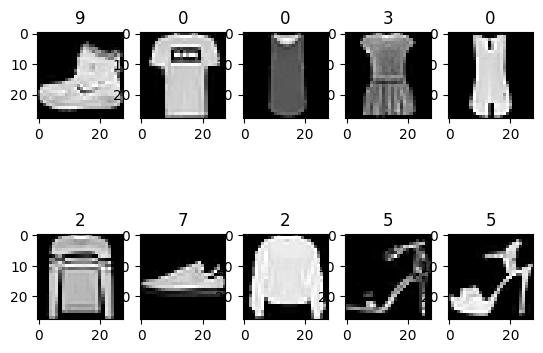

In [10]:
# Watch 10 examples
import matplotlib.pyplot as plt
import numpy as np
for i in range(10):
  img = train_dataset[i][0][0,0:28,0:28]  # train datset -> [idx][imagedata,classidx][only gray, 28,28] -> [i][0][0,:,:]
  plt.subplot(2,5,i+1)
  plt.title(train_dataset[i][1])
  plt.imshow(img,cmap='gray')
plt.show()

In [11]:
# To compare CNN, make simple deep neural network
class DNN(nn.Module):
  def __init__(self):
    super(DNN,self).__init__()
    self.fc1 = nn.Linear(in_features = 1*28*28, out_features = 512)   # Linear model (inputsize = 28*28, output size = ~)
    self.fc2 = nn.Linear(in_features = 512, out_features = 256)
    self.fc3 = nn.Linear(in_features = 256, out_features = 64)
    self.fc4 = nn.Linear(in_features = 64, out_features = 10)

  def forward(self, data):  # forward
    x = data.view(-1,1*28*28) # change tensor as 2 dimension (_,784) -> change it as vector
    x = F.relu(self.fc1(x)) # use F to use relu
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    return x


In [12]:
# loss function and optimizer
model_DNN = DNN()
model_DNN.to(device)
criterion = nn.CrossEntropyLoss() # how to get loss with loss funxtion
optimizer = torch.optim.Adam(model_DNN.parameters(), lr = 0.01) # using 'Adam' optimizer
print(model_DNN)

DNN(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [13]:
# model learning
epochs = 10
Outputs = []

for epoch in range(1,epochs+1):
  loss_epoch = 0
  accuracy_epoch = 0

  for images, labels in train_loader: # get the data in the train_loader(batch_size = 100)
    images, labels = images.to(device), labels.to(device) # Using GPU
    images = images.view(-1,1,28,28)
    optimizer.zero_grad() # reset

    outputs = model_DNN(images)
    loss = criterion(outputs, labels) # loss function

    loss.backward() # backward
    optimizer.step() # act

    loss_epoch += loss.item() # sum each losses made in epach epoch
    y_pred = outputs.argmax(dim=1) # Find the answer using argmax ex) [0,0.1,0.7, 0.15 ...] -> the biggest index:2
    accuracy_epoch += (y_pred == labels).sum().item() # Check the y_pred is right

  loss_avg = loss_epoch/len(train_loader) # Find average of loss
  accuracy_avg = accuracy_epoch/len(train_dataset) # Find average of accuracy
  print(f'Epoch: {epoch:2}, Loss: {loss_avg:10.8f}, Accuracy: {accuracy_avg:10.8f}')

Epoch:  1, Loss: 0.58305797, Accuracy: 0.78980000
Epoch:  2, Loss: 0.46005092, Accuracy: 0.83745000
Epoch:  3, Loss: 0.43368119, Accuracy: 0.84711667
Epoch:  4, Loss: 0.42890733, Accuracy: 0.84918333
Epoch:  5, Loss: 0.41176159, Accuracy: 0.85556667
Epoch:  6, Loss: 0.40091812, Accuracy: 0.85843333
Epoch:  7, Loss: 0.40408827, Accuracy: 0.85938333
Epoch:  8, Loss: 0.39309342, Accuracy: 0.86331667
Epoch:  9, Loss: 0.38694287, Accuracy: 0.86618333
Epoch: 10, Loss: 0.39561683, Accuracy: 0.86560000


In [14]:
# Watch examples of outputs of last batch
print('Prediction: ',y_pred)
print('Labels    : ',labels[:])
accuracy_b = (y_pred == labels[:]).sum().item()/32
print(f'Accuracy of last batch: {accuracy_b} ')

Prediction:  tensor([6, 0, 9, 3, 5, 6, 0, 4, 4, 2, 9, 7, 3, 2, 4, 5, 4, 0, 4, 0, 6, 1, 4, 1,
        7, 2, 8, 5, 1, 3, 0, 5], device='cuda:0')
Labels    :  tensor([6, 6, 9, 3, 5, 6, 0, 4, 4, 2, 9, 7, 3, 2, 4, 5, 4, 0, 4, 6, 6, 1, 4, 1,
        7, 2, 8, 5, 1, 3, 0, 5], device='cuda:0')
Accuracy of last batch: 0.9375 


In [15]:
# Test set accuracy - simple Deep Neural Network
accuracy_total = 0
loss_total = 0

for images, labels in test_loader:  # Same as what we did in train model, the difference is just using test_loader
  images, labels = images.to(device), labels.to(device)
  images = images.view(-1,1,28,28)
  prediction = model_DNN(images)
  y_pred = prediction.argmax(dim=1)
  loss = criterion(prediction, labels)
  loss_total += loss.item()
  accuracy_total += (y_pred == labels).sum().item()

loss_avg = loss_total/len(test_dataset)
accuracy_avg = accuracy_total/len(test_dataset)

print(f'Test set Loss: {loss_avg:10.8f}, Accuracy: {accuracy_avg:10.8f}')


Test set Loss: 0.01527476, Accuracy: 0.83700000


In [16]:
# Making Convolution neural network model
class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()
    self.layer1 = nn.Sequential( # Sequential: we can make layers more simple
        # Conv2d: making convolution layer with kernel
        # in_channel(grey:1, RGB:3), out_channels: make new feature map, kernel_size: the size of filter, stride: stride of moving filter, padding: add 0 in the edge
        # outut size = (inputsize-kernelsize+2*padding)/stride + 1 => (28-3+(2*1)/1)+1 = 28
        nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = 3, stride = 1,padding=1),
        # Batchnorm: make gaussian distribution
        nn.BatchNorm2d(32),
        nn.ReLU(),
        # outputsize = (inputsize/kernelsize) => 28/2 = 14
        nn.MaxPool2d(kernel_size = 2, stride = 2)
    )
    self.layer2 = nn.Sequential(
        nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, stride = 1, padding = 1),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        # outputsize => 14/2 = 7
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
  # outputsize => (-1,64,7,7) so, I need to change it as 10
    self.fc1 = nn.Linear(64*7*7, 512)
    self.fc2 = nn.Linear(512,64)
    self.fc3 = nn.Linear(64,10)

  def forward(self,x):
    x = self.layer1(x)
    x = self.layer2(x)
    x = x.view(-1,64*7*7)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [17]:
model_CNN = CNN()
model_CNN.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_CNN.parameters(), lr = 0.01)
print(model_CNN)

CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=3136, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [18]:
# model learning - same as what I did
epochs = 10

for epoch in range(1,epochs+1):
  loss_epoch = 0
  accuracy_epoch = 0

  for images, labels in train_loader:
    images, labels = images.to(device), labels.to(device)
    images = images.view(-1,1,28,28)
    optimizer.zero_grad()

    outputs = model_CNN(images)
    loss = criterion(outputs, labels)

    loss.backward()
    optimizer.step()

    loss_epoch += loss.item()
    y_pred = outputs.argmax(dim=1)
    accuracy_epoch += (y_pred == labels).sum().item()

  loss_avg = loss_epoch/len(train_loader)
  accuracy_avg = accuracy_epoch/len(train_dataset)
  print(f'Epoch: {epoch:2}, Loss: {loss_avg:10.8f}, Accuracy: {accuracy_avg:10.8f}')

Epoch:  1, Loss: 0.51501539, Accuracy: 0.82125000
Epoch:  2, Loss: 0.32001834, Accuracy: 0.88541667
Epoch:  3, Loss: 0.28384453, Accuracy: 0.89895000
Epoch:  4, Loss: 0.26470753, Accuracy: 0.90595000
Epoch:  5, Loss: 0.25230575, Accuracy: 0.91105000
Epoch:  6, Loss: 0.23845374, Accuracy: 0.91520000
Epoch:  7, Loss: 0.23301774, Accuracy: 0.91728333
Epoch:  8, Loss: 0.22093198, Accuracy: 0.92270000
Epoch:  9, Loss: 0.21905044, Accuracy: 0.92386667
Epoch: 10, Loss: 0.21524225, Accuracy: 0.92606667


In [19]:
# Watch examples of outputs of last batch
print('Prediction: ',y_pred)
print('Labels    : ',labels[:])
accuracy_b = (y_pred == labels[:]).sum().item()/32
print(f'Accuracy of last batch: {accuracy_b} ')

Prediction:  tensor([6, 6, 9, 3, 5, 6, 6, 4, 4, 2, 9, 7, 3, 0, 4, 5, 4, 0, 4, 6, 6, 1, 4, 1,
        7, 2, 8, 5, 1, 3, 0, 5], device='cuda:0')
Labels    :  tensor([6, 6, 9, 3, 5, 6, 0, 4, 4, 2, 9, 7, 3, 2, 4, 5, 4, 0, 4, 6, 6, 1, 4, 1,
        7, 2, 8, 5, 1, 3, 0, 5], device='cuda:0')
Accuracy of last batch: 0.9375 


In [21]:
# Test set accuracy - CNN
accuracy_total = 0
loss_total = 0

for images, labels in test_loader:
  images, labels = images.to(device), labels.to(device)
  images = images.view(-1,1,28,28)
  prediction = model_CNN(images)
  y_pred = prediction.argmax(dim=1)
  loss = criterion(prediction, labels)
  loss_total += loss.item()
  accuracy_total += (y_pred == labels).sum().item()

loss_avg = loss_total/len(test_dataset)
accuracy_avg = accuracy_total/len(test_dataset)

print(f'Test set Loss: {loss_avg:10.8f}, Accuracy: {accuracy_avg:10.8f}')


Test set Loss: 0.01271319, Accuracy: 0.88410000
